In [ ]:
import pandas as pd
df = pd.read_csv('D:/dataset/Churn_Modelling.csv')

In [2]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [6]:
#Pisahkan kolom yang akan dicek outliers nya 
df_out = df[['CreditScore', 'Age', 'Tenure', 'Balance','EstimatedSalary']]

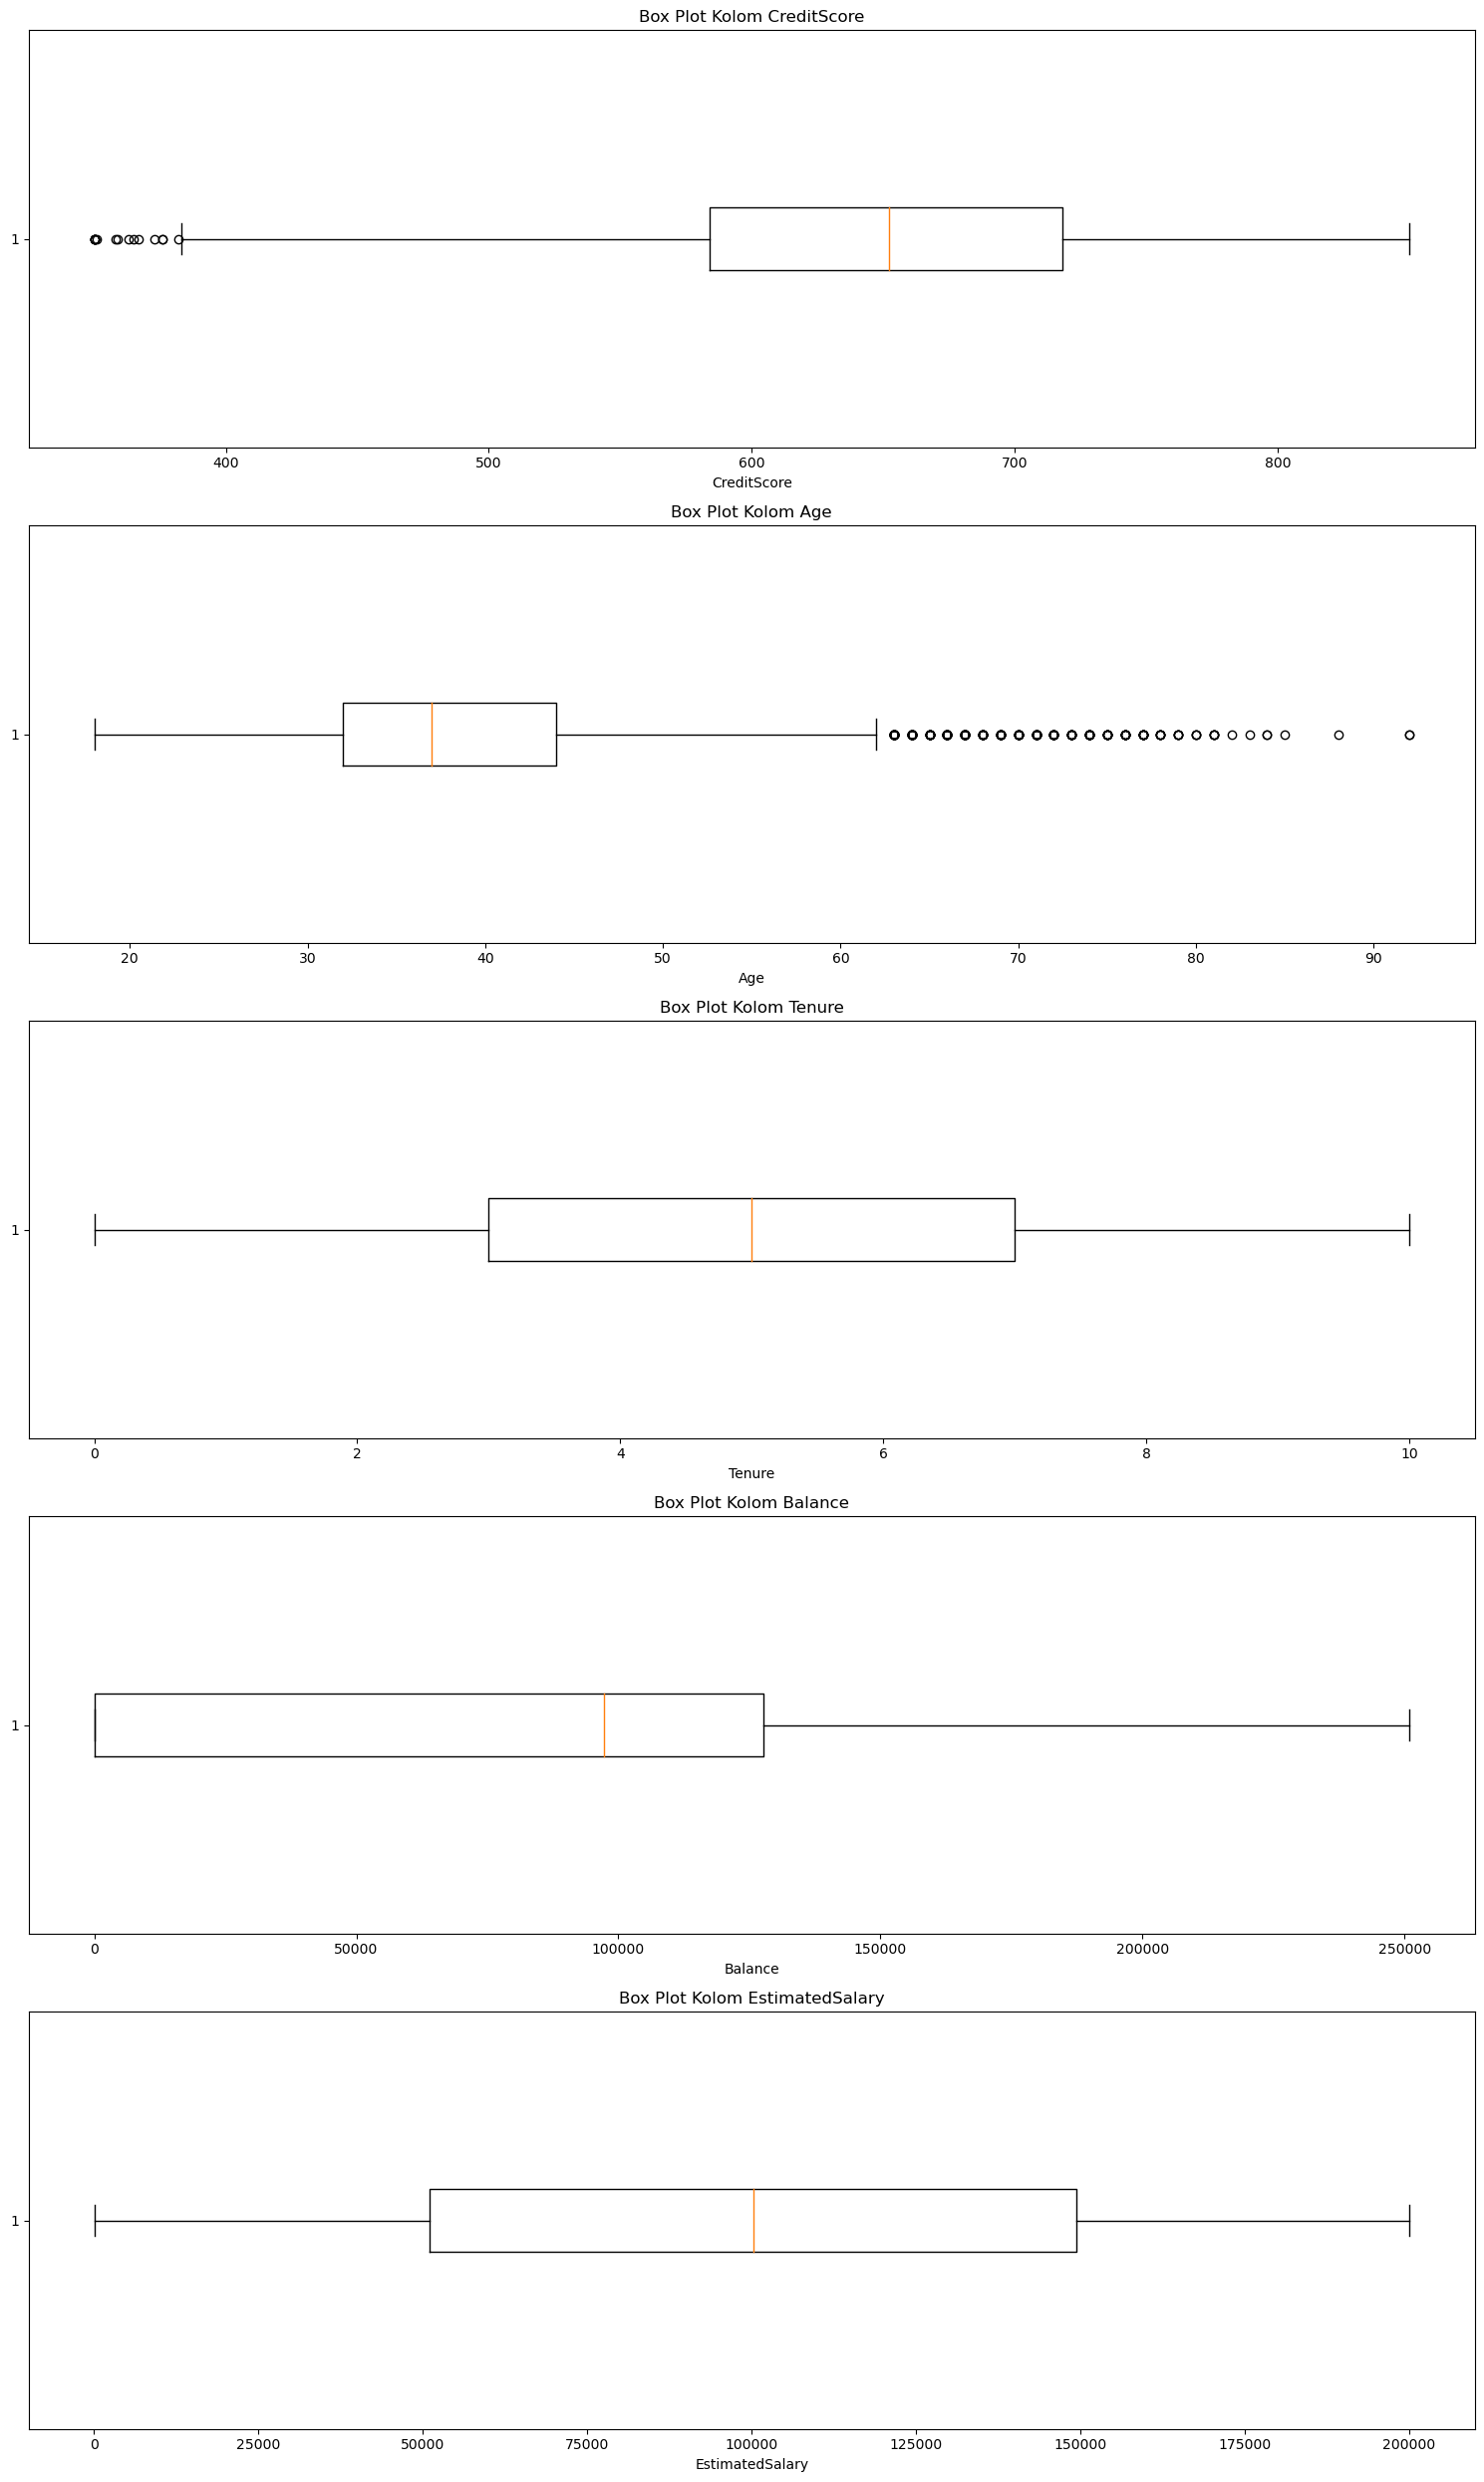

In [7]:
import matplotlib.pyplot as plt

# Dataframe Anda disimpan dalam variabel df

# Menghitung jumlah kolom dalam DataFrame
num_columns = len(df_out.columns)

# Menentukan ukuran plot sesuai dengan jumlah kolom
plt.figure(figsize=(15, 5*num_columns))

# Loop melalui setiap kolom dan membuat box plot
for i, column in enumerate(df_out.columns):
    plt.subplot(num_columns, 1, i+1)
    plt.boxplot(df_out[column], vert=False)  # vert=False untuk mengatur orientasi menjadi horizontal
    plt.title(f'Box Plot Kolom {column}')
    plt.xlabel(column)

# Menampilkan plot
plt.tight_layout()
plt.show()

In [9]:
df['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

In [15]:
#memisahkan kolom ke dalam categorical
df_cat = df[['Surname','Geography', 'Gender','Exited']]

In [16]:
df_cat.head()

,Surname,Geography,Gender,Exited
0,Hargrave,France,Female,1
1,Hill,Spain,Female,0
2,Onio,France,Female,1
3,Boni,France,Female,0
4,Mitchell,Spain,Female,0


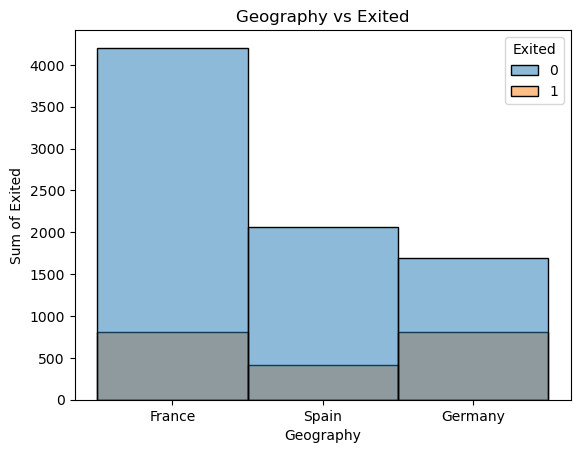

In [19]:
sns.histplot(data=df_cat, x=df_cat['Geography'], hue=df_cat['Exited'])
plt.title('Geography vs Exited')
plt.ylabel('Sum of Exited')
plt.savefig('Geography vs Exited')

### Insight
**Berdasarkan analisa menggunakan kolom geography, kami mendapatkan bahwa negara germany memiliki tingkat yang berpotensi churn terbanyak diantara kedua negara lainnya. Oleh karena itu, perlunya action yang harus dilakukan terhadap negara tersebut agar pelanggan dapat betah dengan product yang ditawarkan**

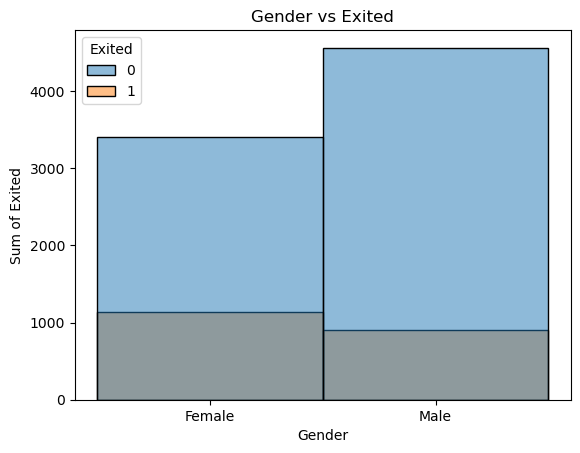

In [20]:
import seaborn as sns
sns.histplot(data=df_cat, x=df_cat['Gender'], hue=df_cat['Exited'])
plt.title('Gender vs Exited')
plt.ylabel('Sum of Exited')
plt.savefig('Gender vs Exited')

## Insight
**Berdasarkan analisa menggunakan kolom Gender, didapatkan bahwa pelanggan dengan jenis kelamin female lebih berpotensi untuk melakukan churn daripada laki-laki. Oleh karna itu, bank harus lebih memberikan banyak tindakan terhadap nasabah perempuan agar tetap menjadi nasabah pada bank tersebut.**

<AxesSubplot:xlabel='Age', ylabel='Count'>

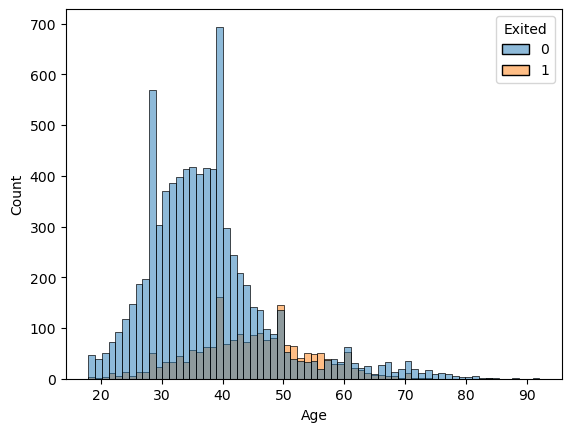

In [22]:
sns.histplot(data=df, x=df['Age'], hue=df['Exited'])

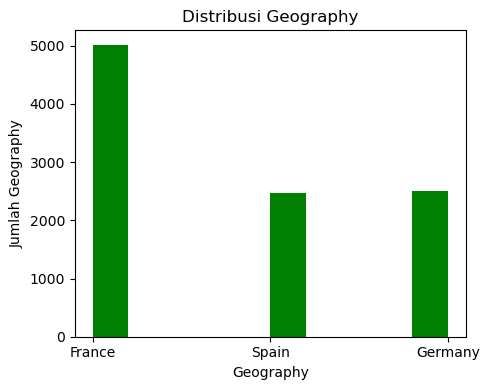

In [27]:
plt.figure(figsize=(5, 4))
plt.hist(df_cat['Geography'], bins=10, color='green')
plt.xlabel('Geography')
plt.ylabel('Jumlah Geography')
plt.title('Distribusi Geography')
plt.tight_layout()
plt.show()

#Geography_counts = (df['Geography'].value_counts())
#print(Geography_counts)

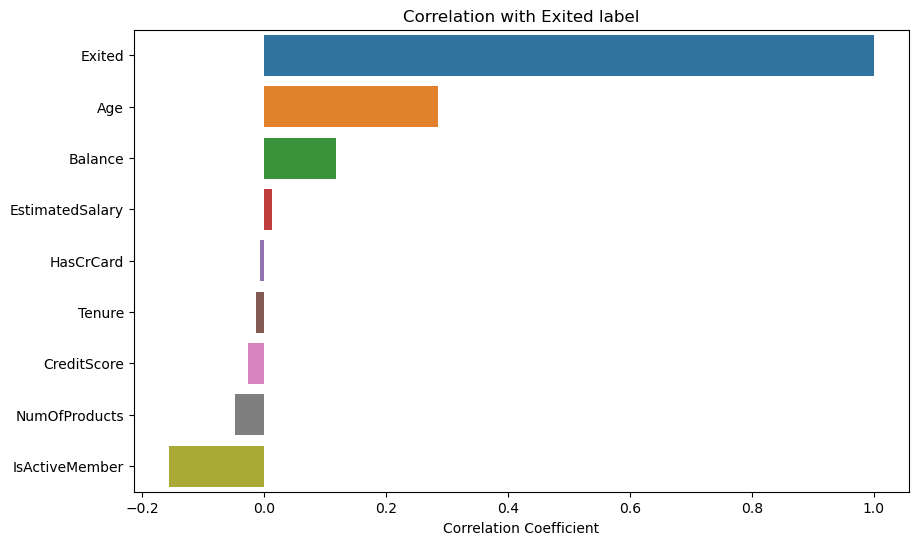

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-relevant columns for the correlation analysis
df_corr = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Compute the correlation with the 'Exited' column
correlation_with_label = df_corr.corr()['Exited'].sort_values(ascending=False)

# Plot the correlation with the 'Exited' column
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_label.values, y=correlation_with_label.index)
plt.title('Correlation with Exited label')
plt.xlabel('Correlation Coefficient')
plt.show()

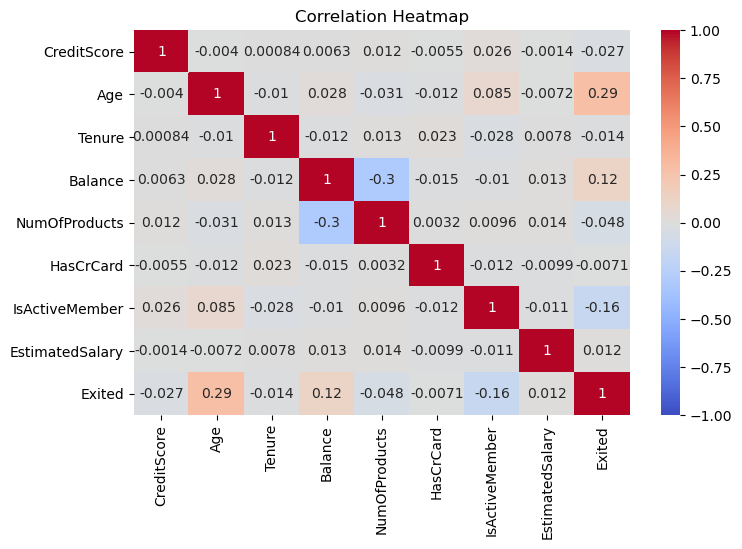

In [11]:
# Compute the correlation matrix
correlation_matrix = df_corr.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

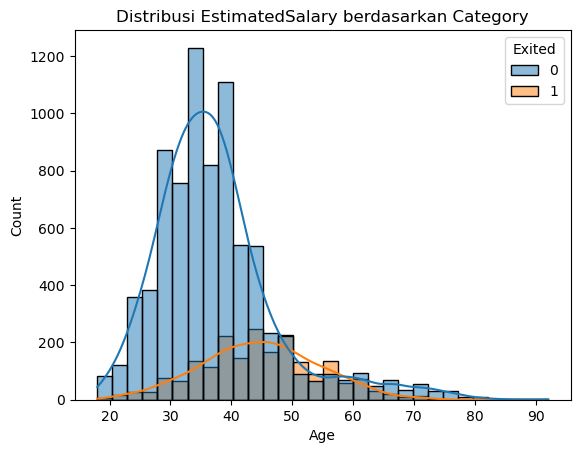

In [12]:
sns.histplot(data=df, x="Age", hue="Exited", bins=30, kde=True)
plt.title("Distribusi EstimatedSalary berdasarkan Category")
plt.show()

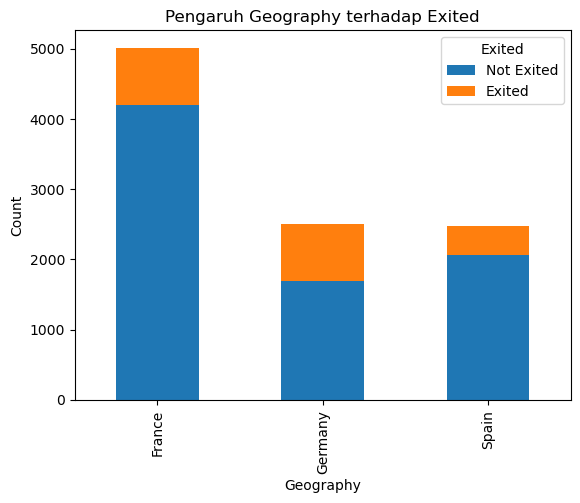

In [13]:
# Membuat pivot table yang menunjukkan jumlah eksit berdasarkan Geography
pivot_table = df.pivot_table(index='Geography', columns='Exited', aggfunc='size', fill_value=0)

# Membuat stacked bar plot
pivot_table.plot(kind='bar', stacked=True)
plt.title("Pengaruh Geography terhadap Exited")
plt.xlabel("Geography")
plt.ylabel("Count")
plt.legend(title='Exited', labels=['Not Exited', 'Exited'])
plt.show()